# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

In [27]:
# required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [28]:
# uploading data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [29]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [30]:
df.shape

(30, 17)

In [31]:
df.isnull().sum()# checking null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [32]:
df.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<AxesSubplot:>

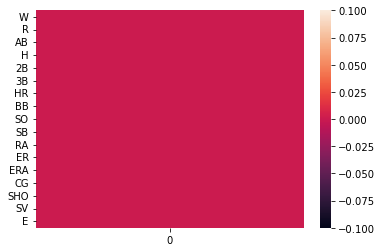

In [33]:
sns.heatmap(df.isnull().sum().to_frame())

In [34]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [35]:
# these are the unique values of each columns

W is the target value
checking missing values in the data set

In [15]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [16]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Data Visualizartion

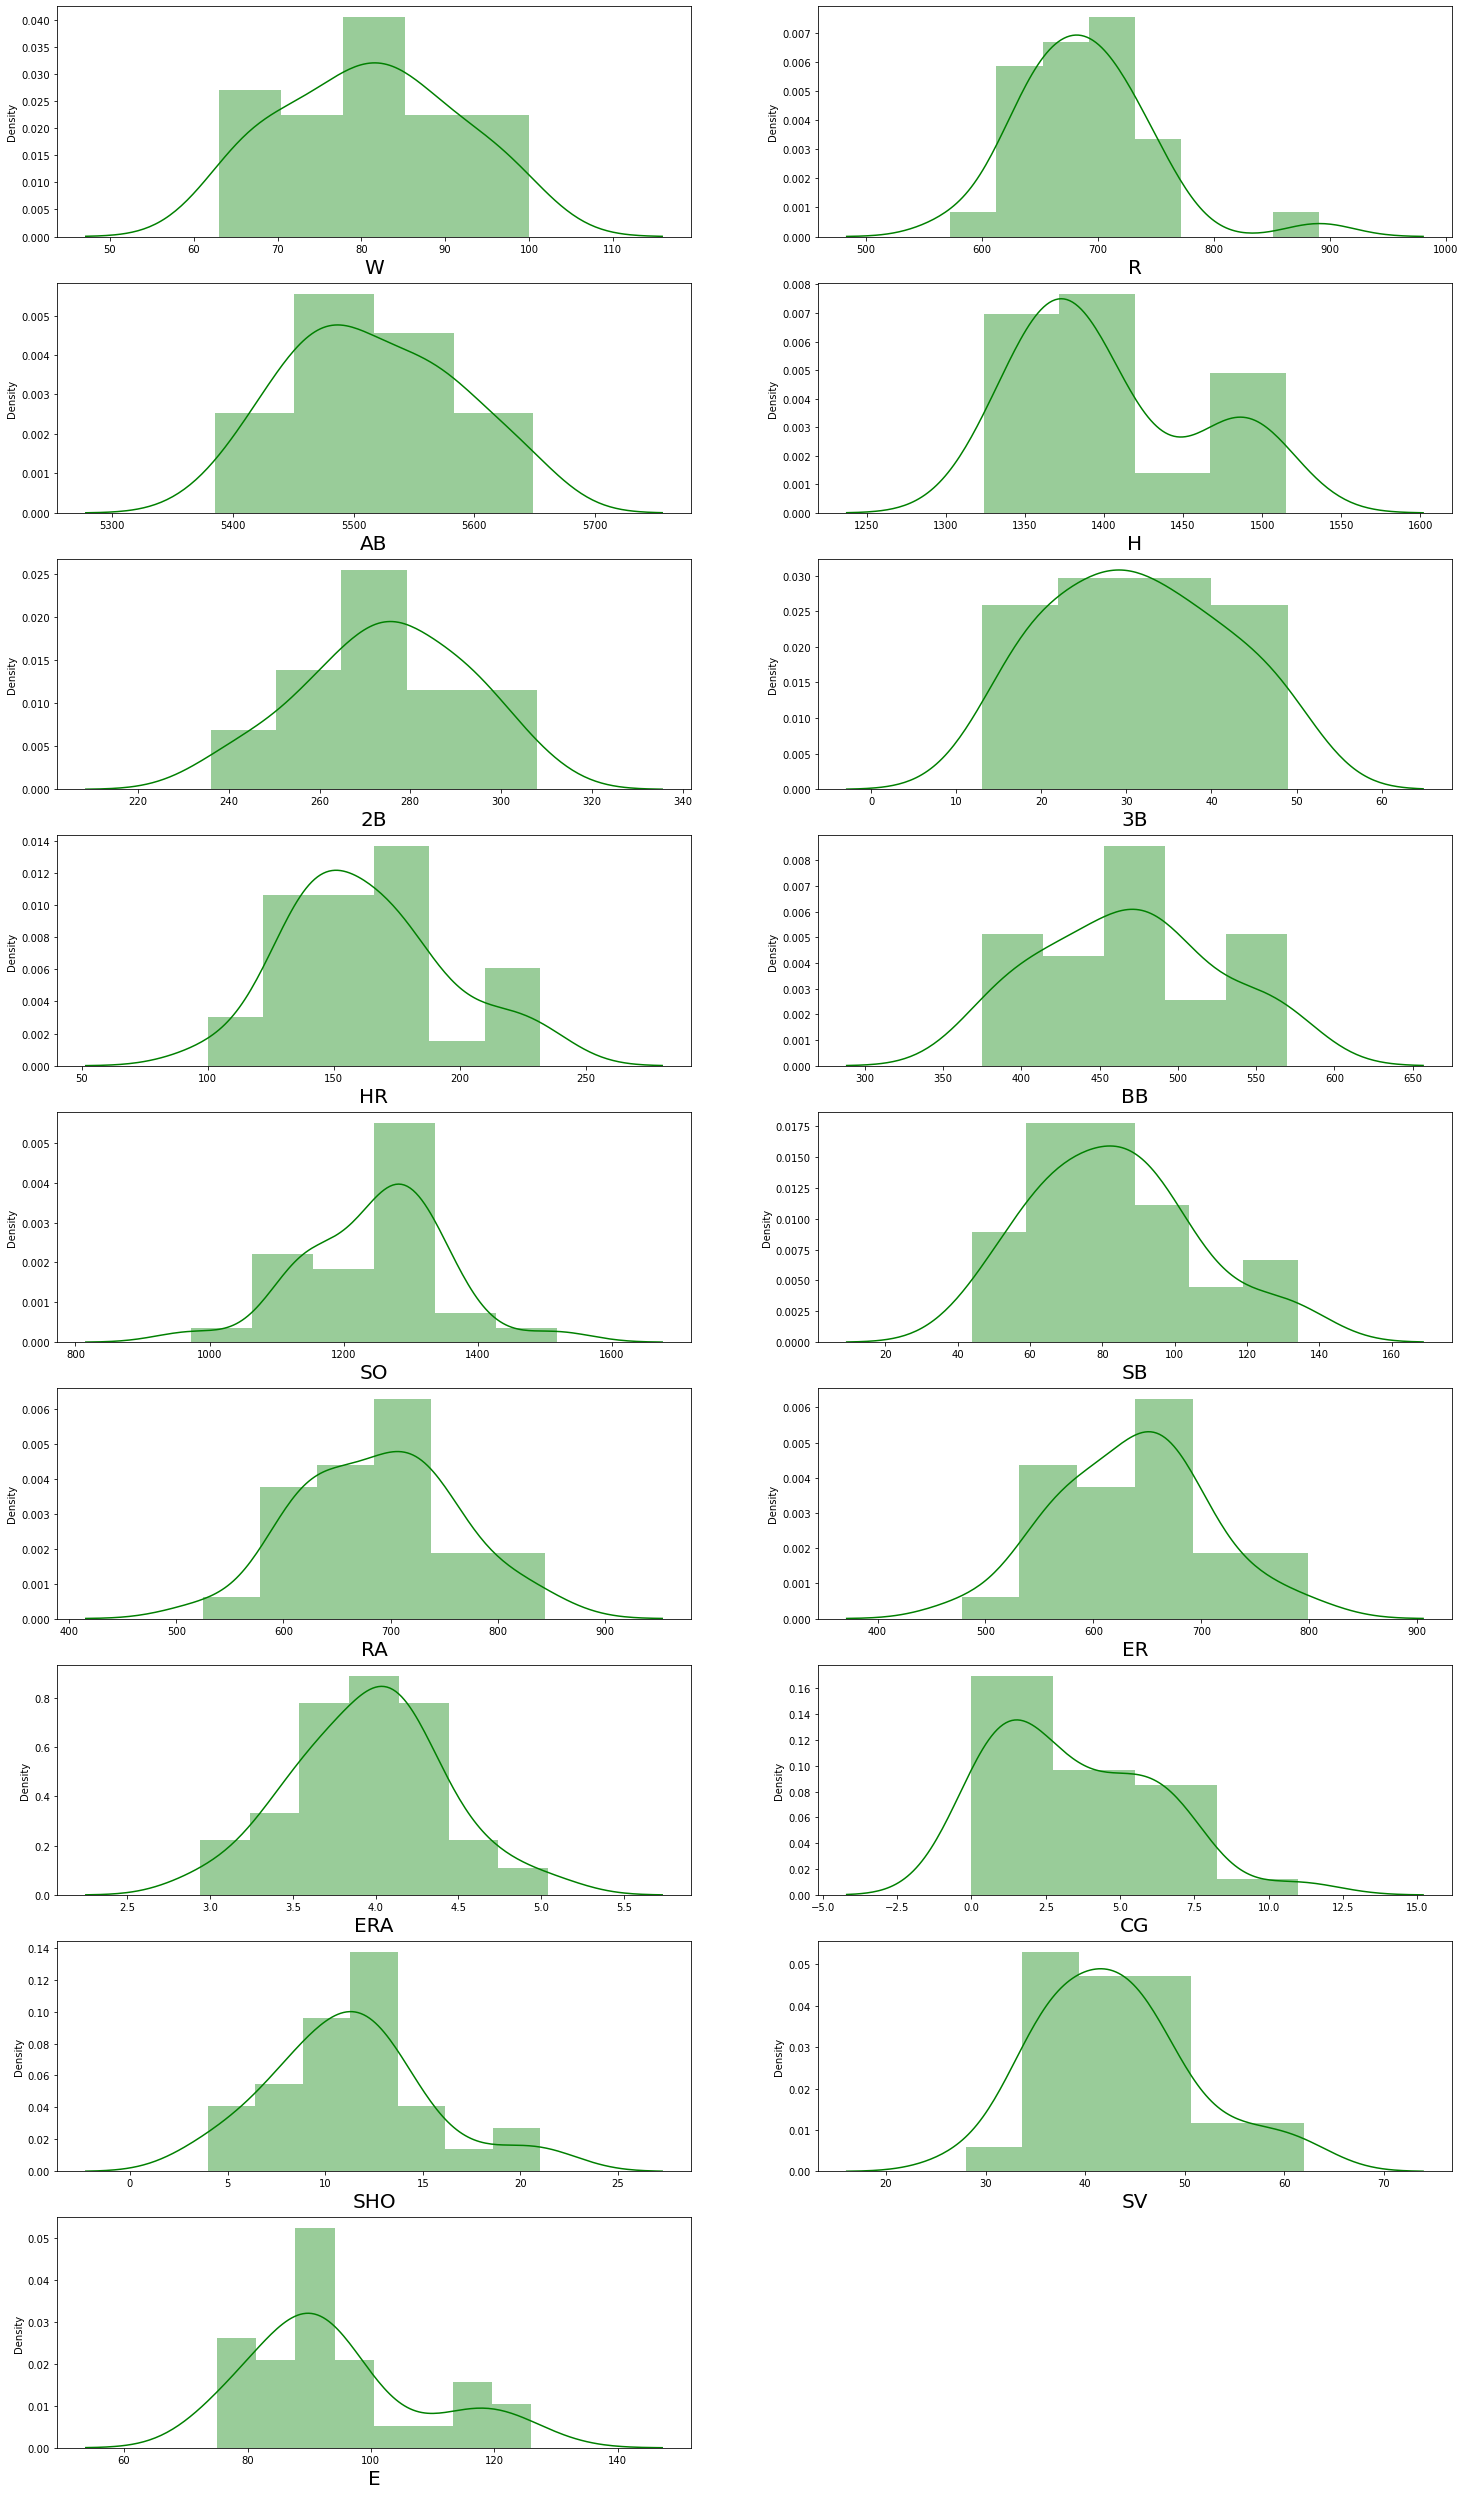

In [17]:
plt.figure(figsize=(25,50))
plotnumber =1

for column in df:
    if plotnumber  <=17:
        
        ax= plt.subplot(10,2,plotnumber)
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize= 20)
        
        

    plotnumber +=1
plt.show()
                     

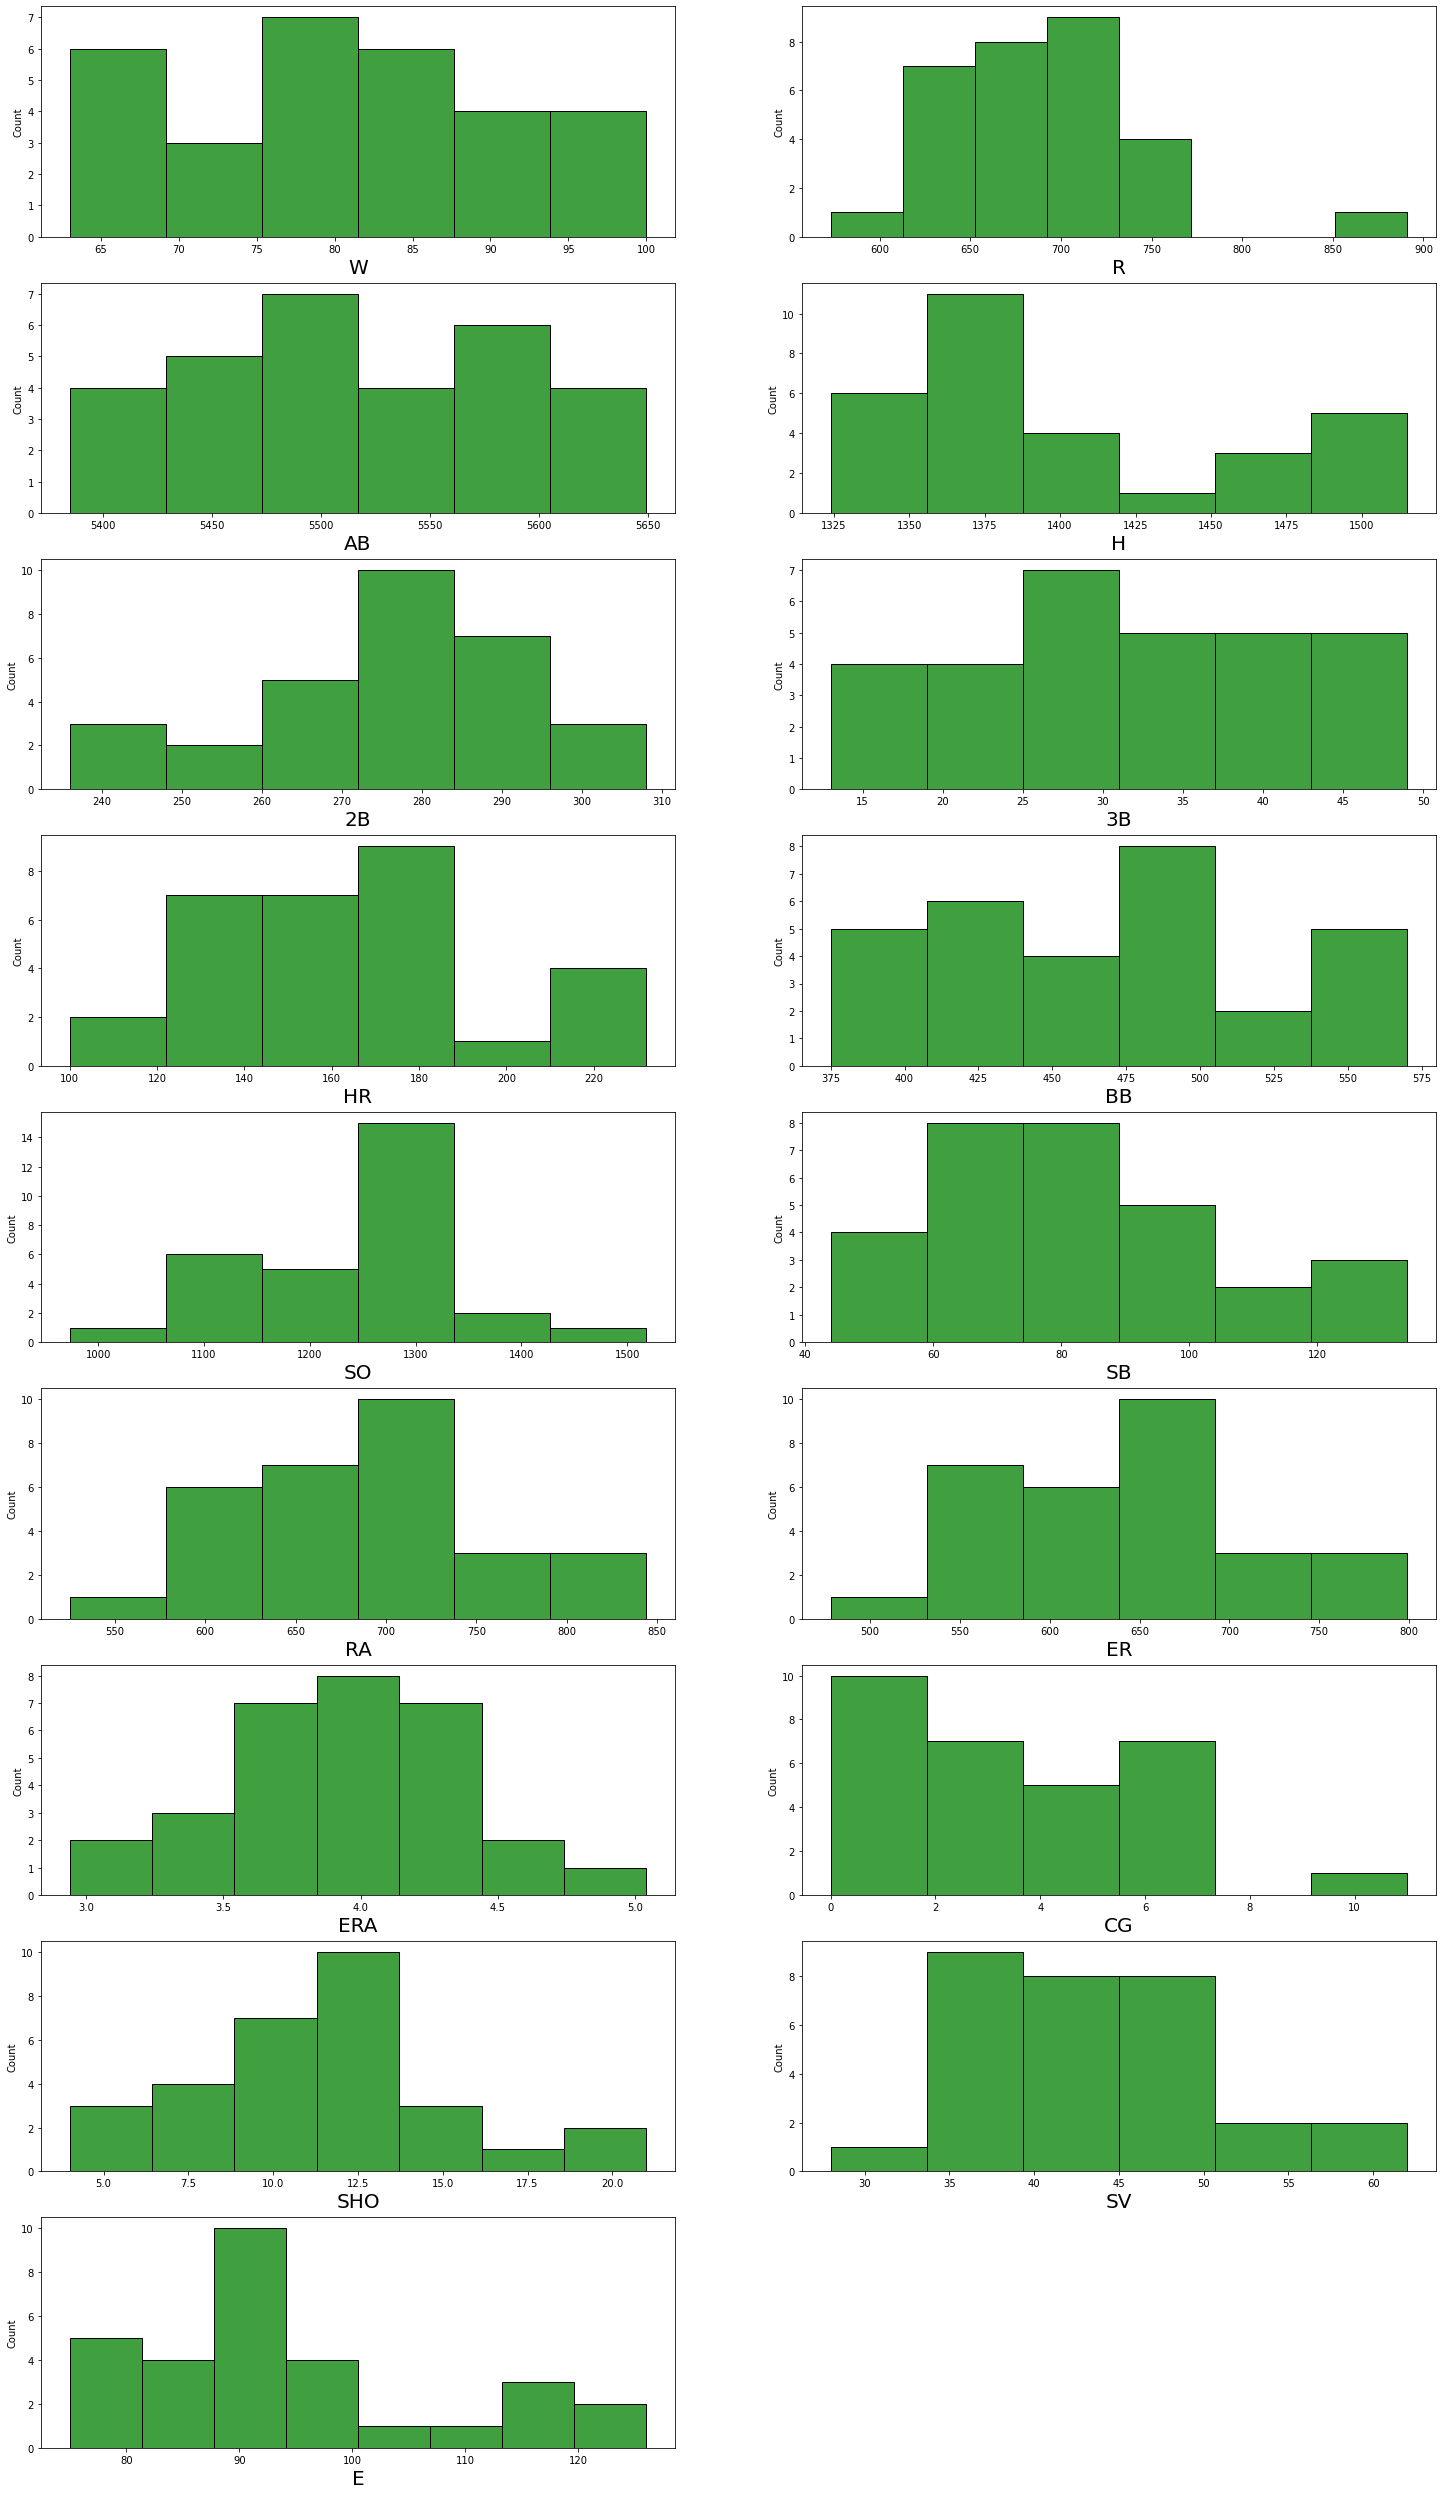

In [36]:
plt.figure(figsize=(25,50))
plotnumber =1

for column in df:
    if plotnumber  <=17:
        
        ax= plt.subplot(10,2,plotnumber)
        sns.histplot(df[column],color='green')
        plt.xlabel(column,fontsize= 20)
        
        

    plotnumber +=1
plt.show()
                     

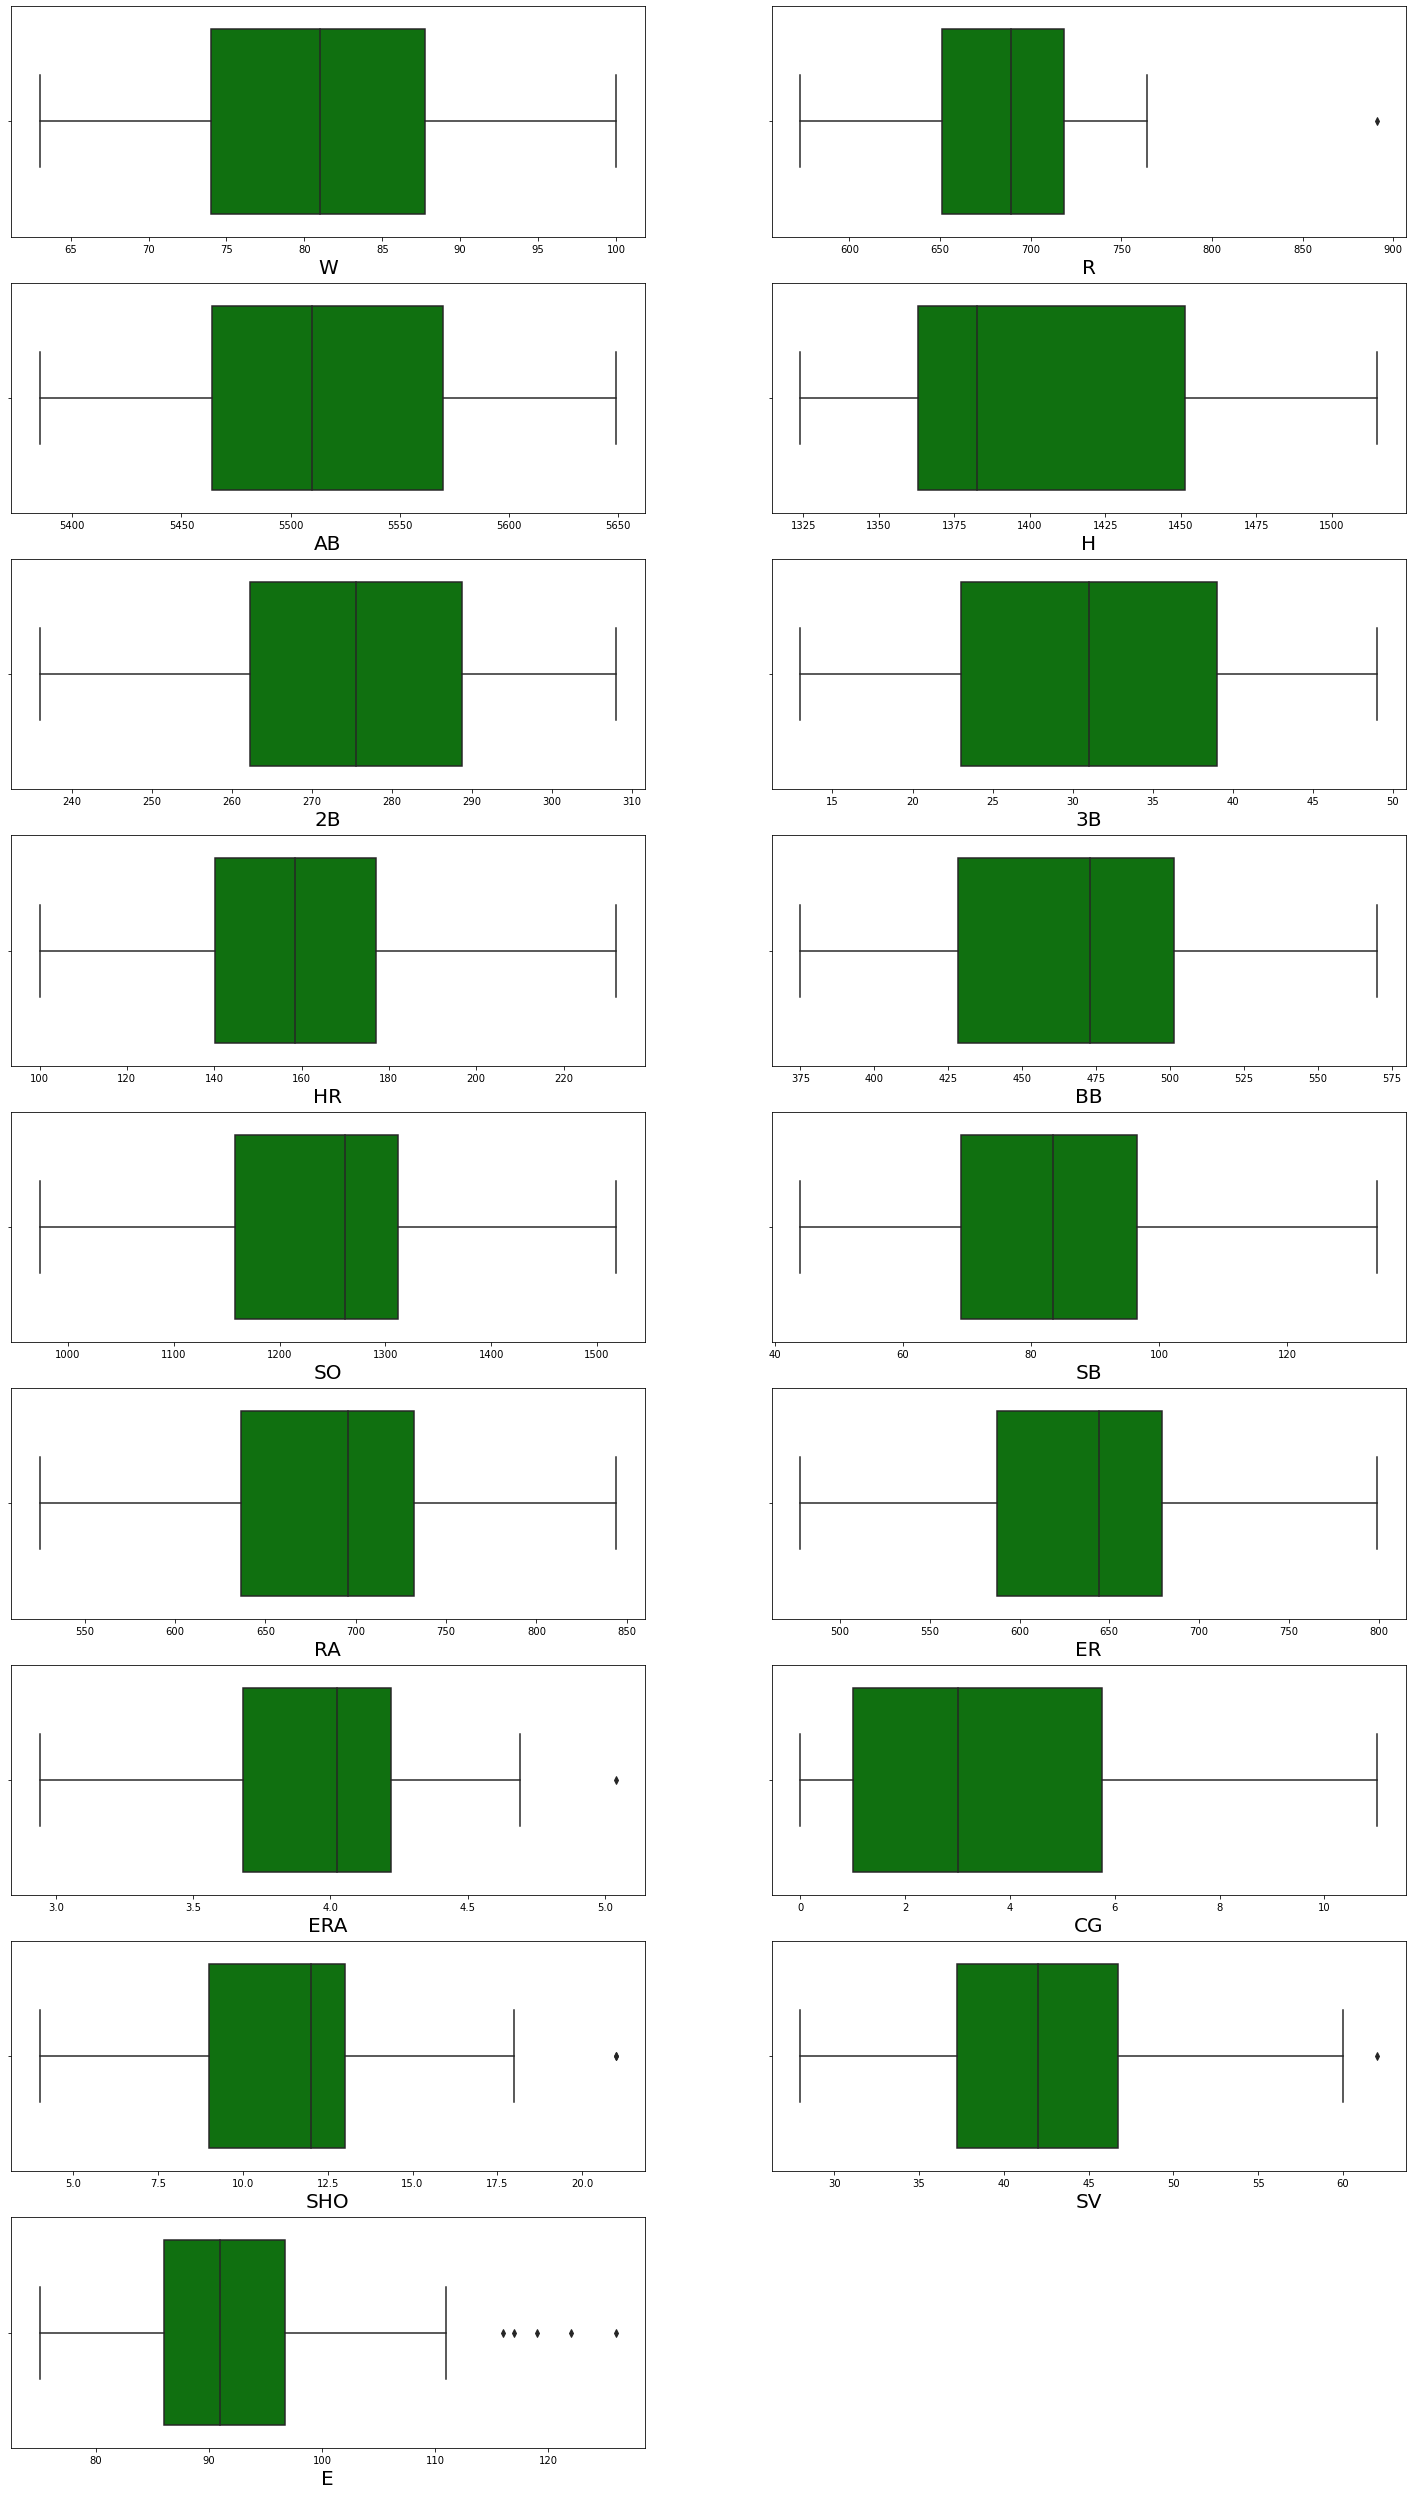

In [37]:
plt.figure(figsize=(25,50))
plotnumber =1

for column in df:
    if plotnumber  <=17:
        
        ax= plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column],color='green')
        plt.xlabel(column,fontsize= 20)
        
        

    plotnumber +=1
plt.show()
               

As shown in boxplot R,ERA ,SHO,SV and E input variable is having outliers in it, need to remove outliers from that the input variables

<Figure size 1800x1440 with 0 Axes>

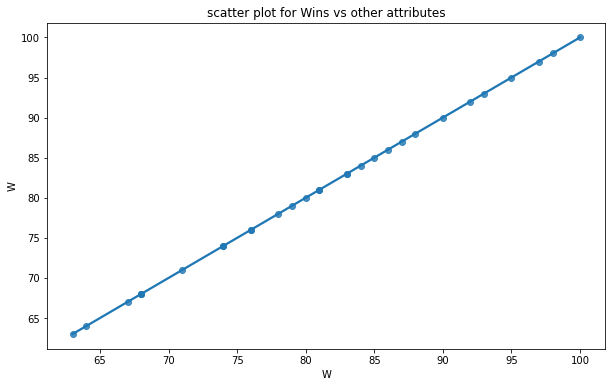

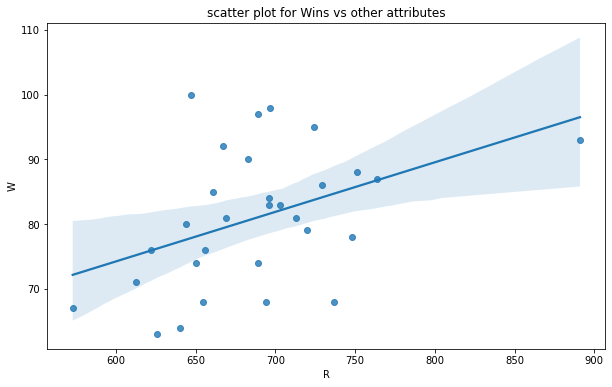

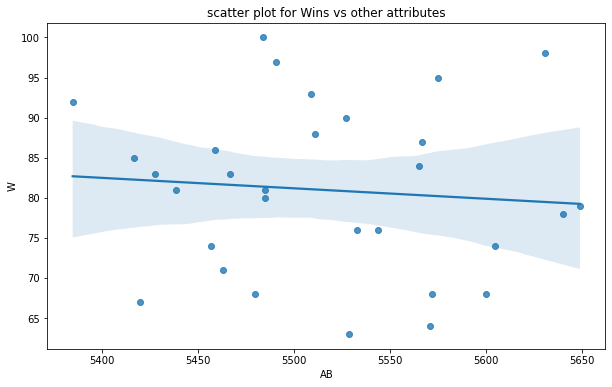

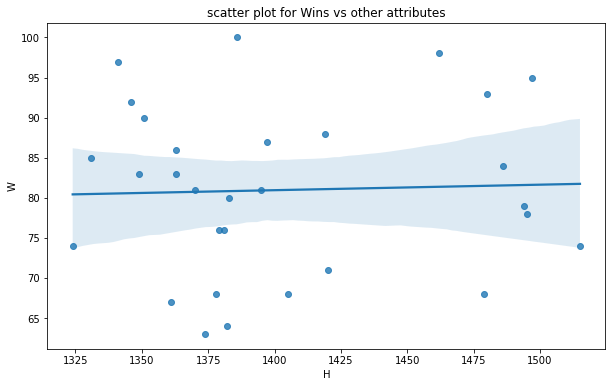

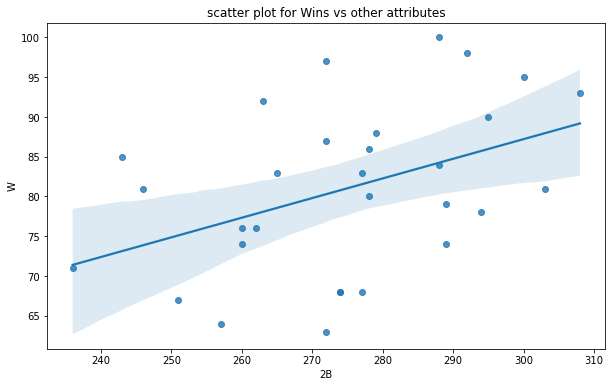

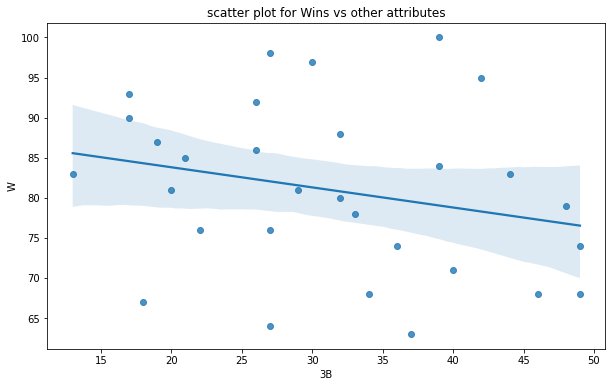

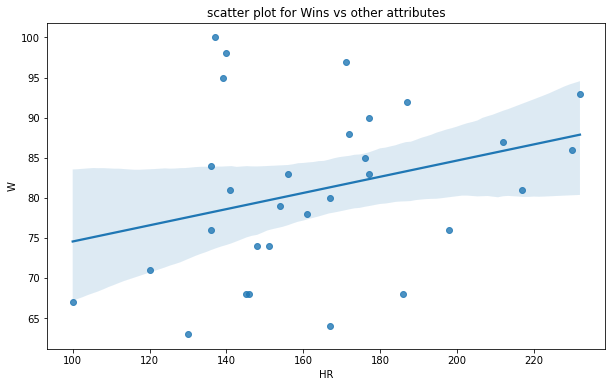

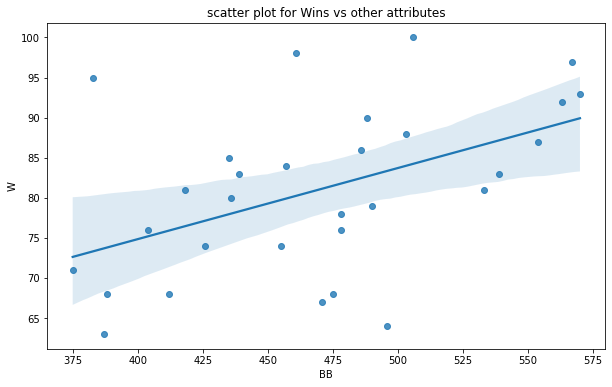

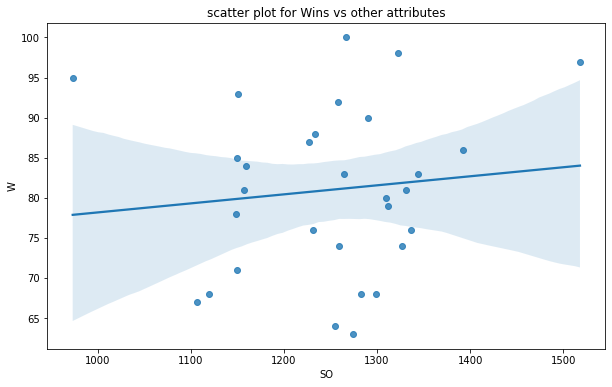

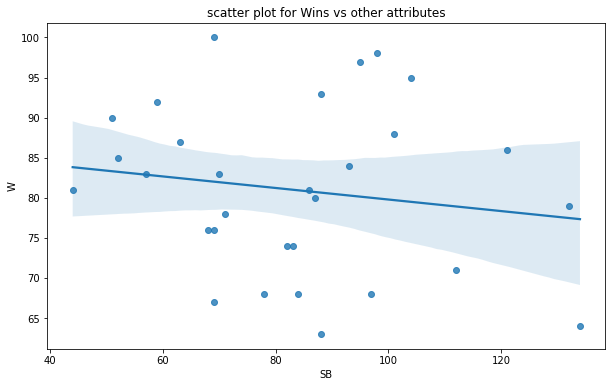

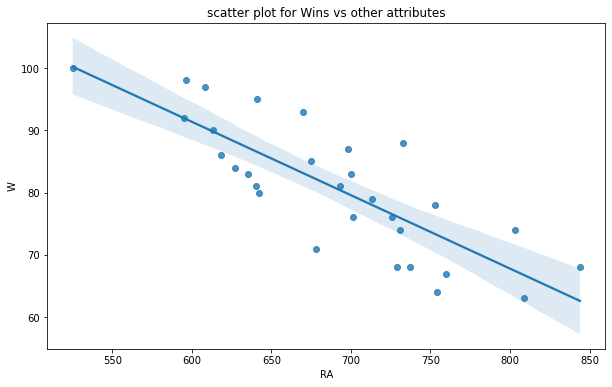

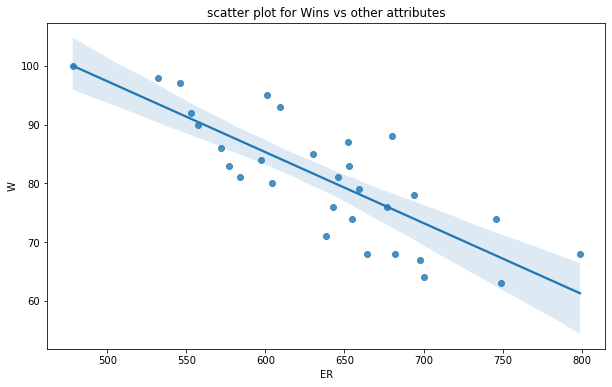

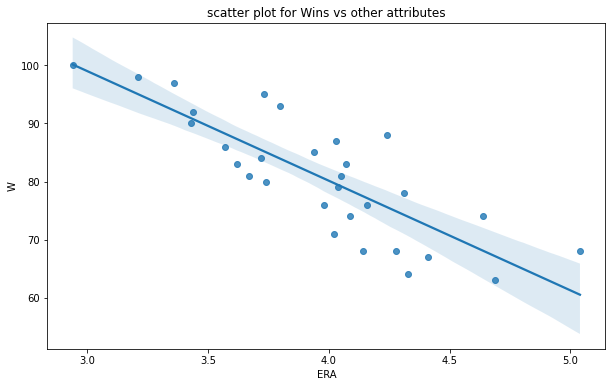

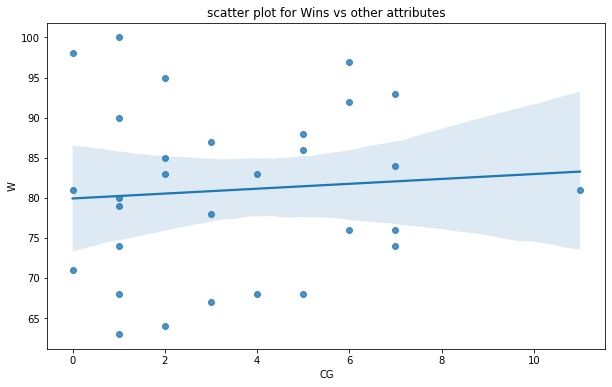

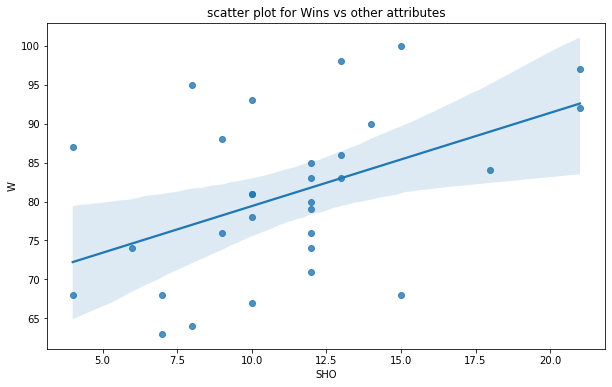

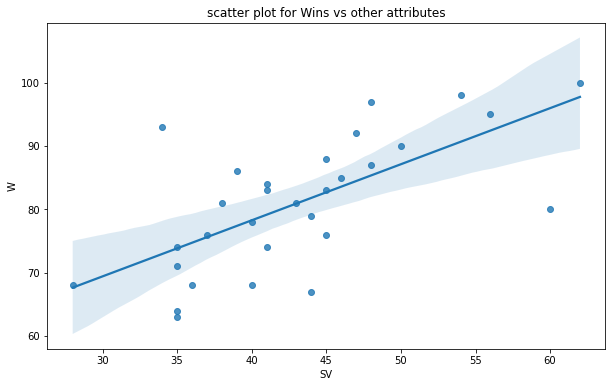

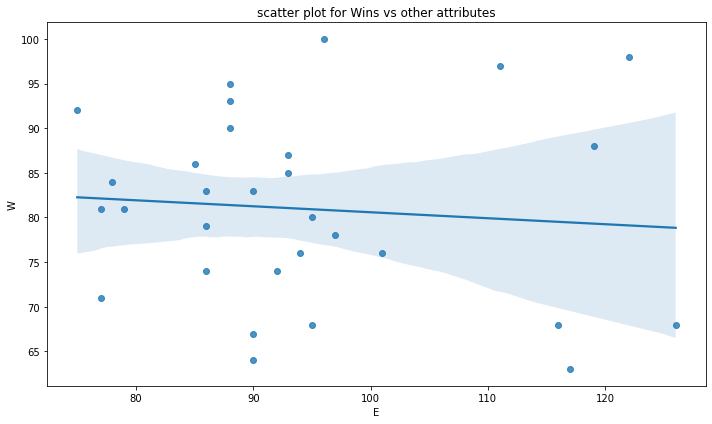

In [38]:
plt.figure(figsize=(25,20), facecolor = 'white')
plotnumber=1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize= (10,6))
        
        sns.regplot(df[column],df['W'])
        plt.title('scatter plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
plt.tight_layout()        

In [39]:
RA, ER, ERA have good relation with W. rest all column's scatered across all places

SyntaxError: invalid syntax (Temp/ipykernel_16828/2220035366.py, line 1)

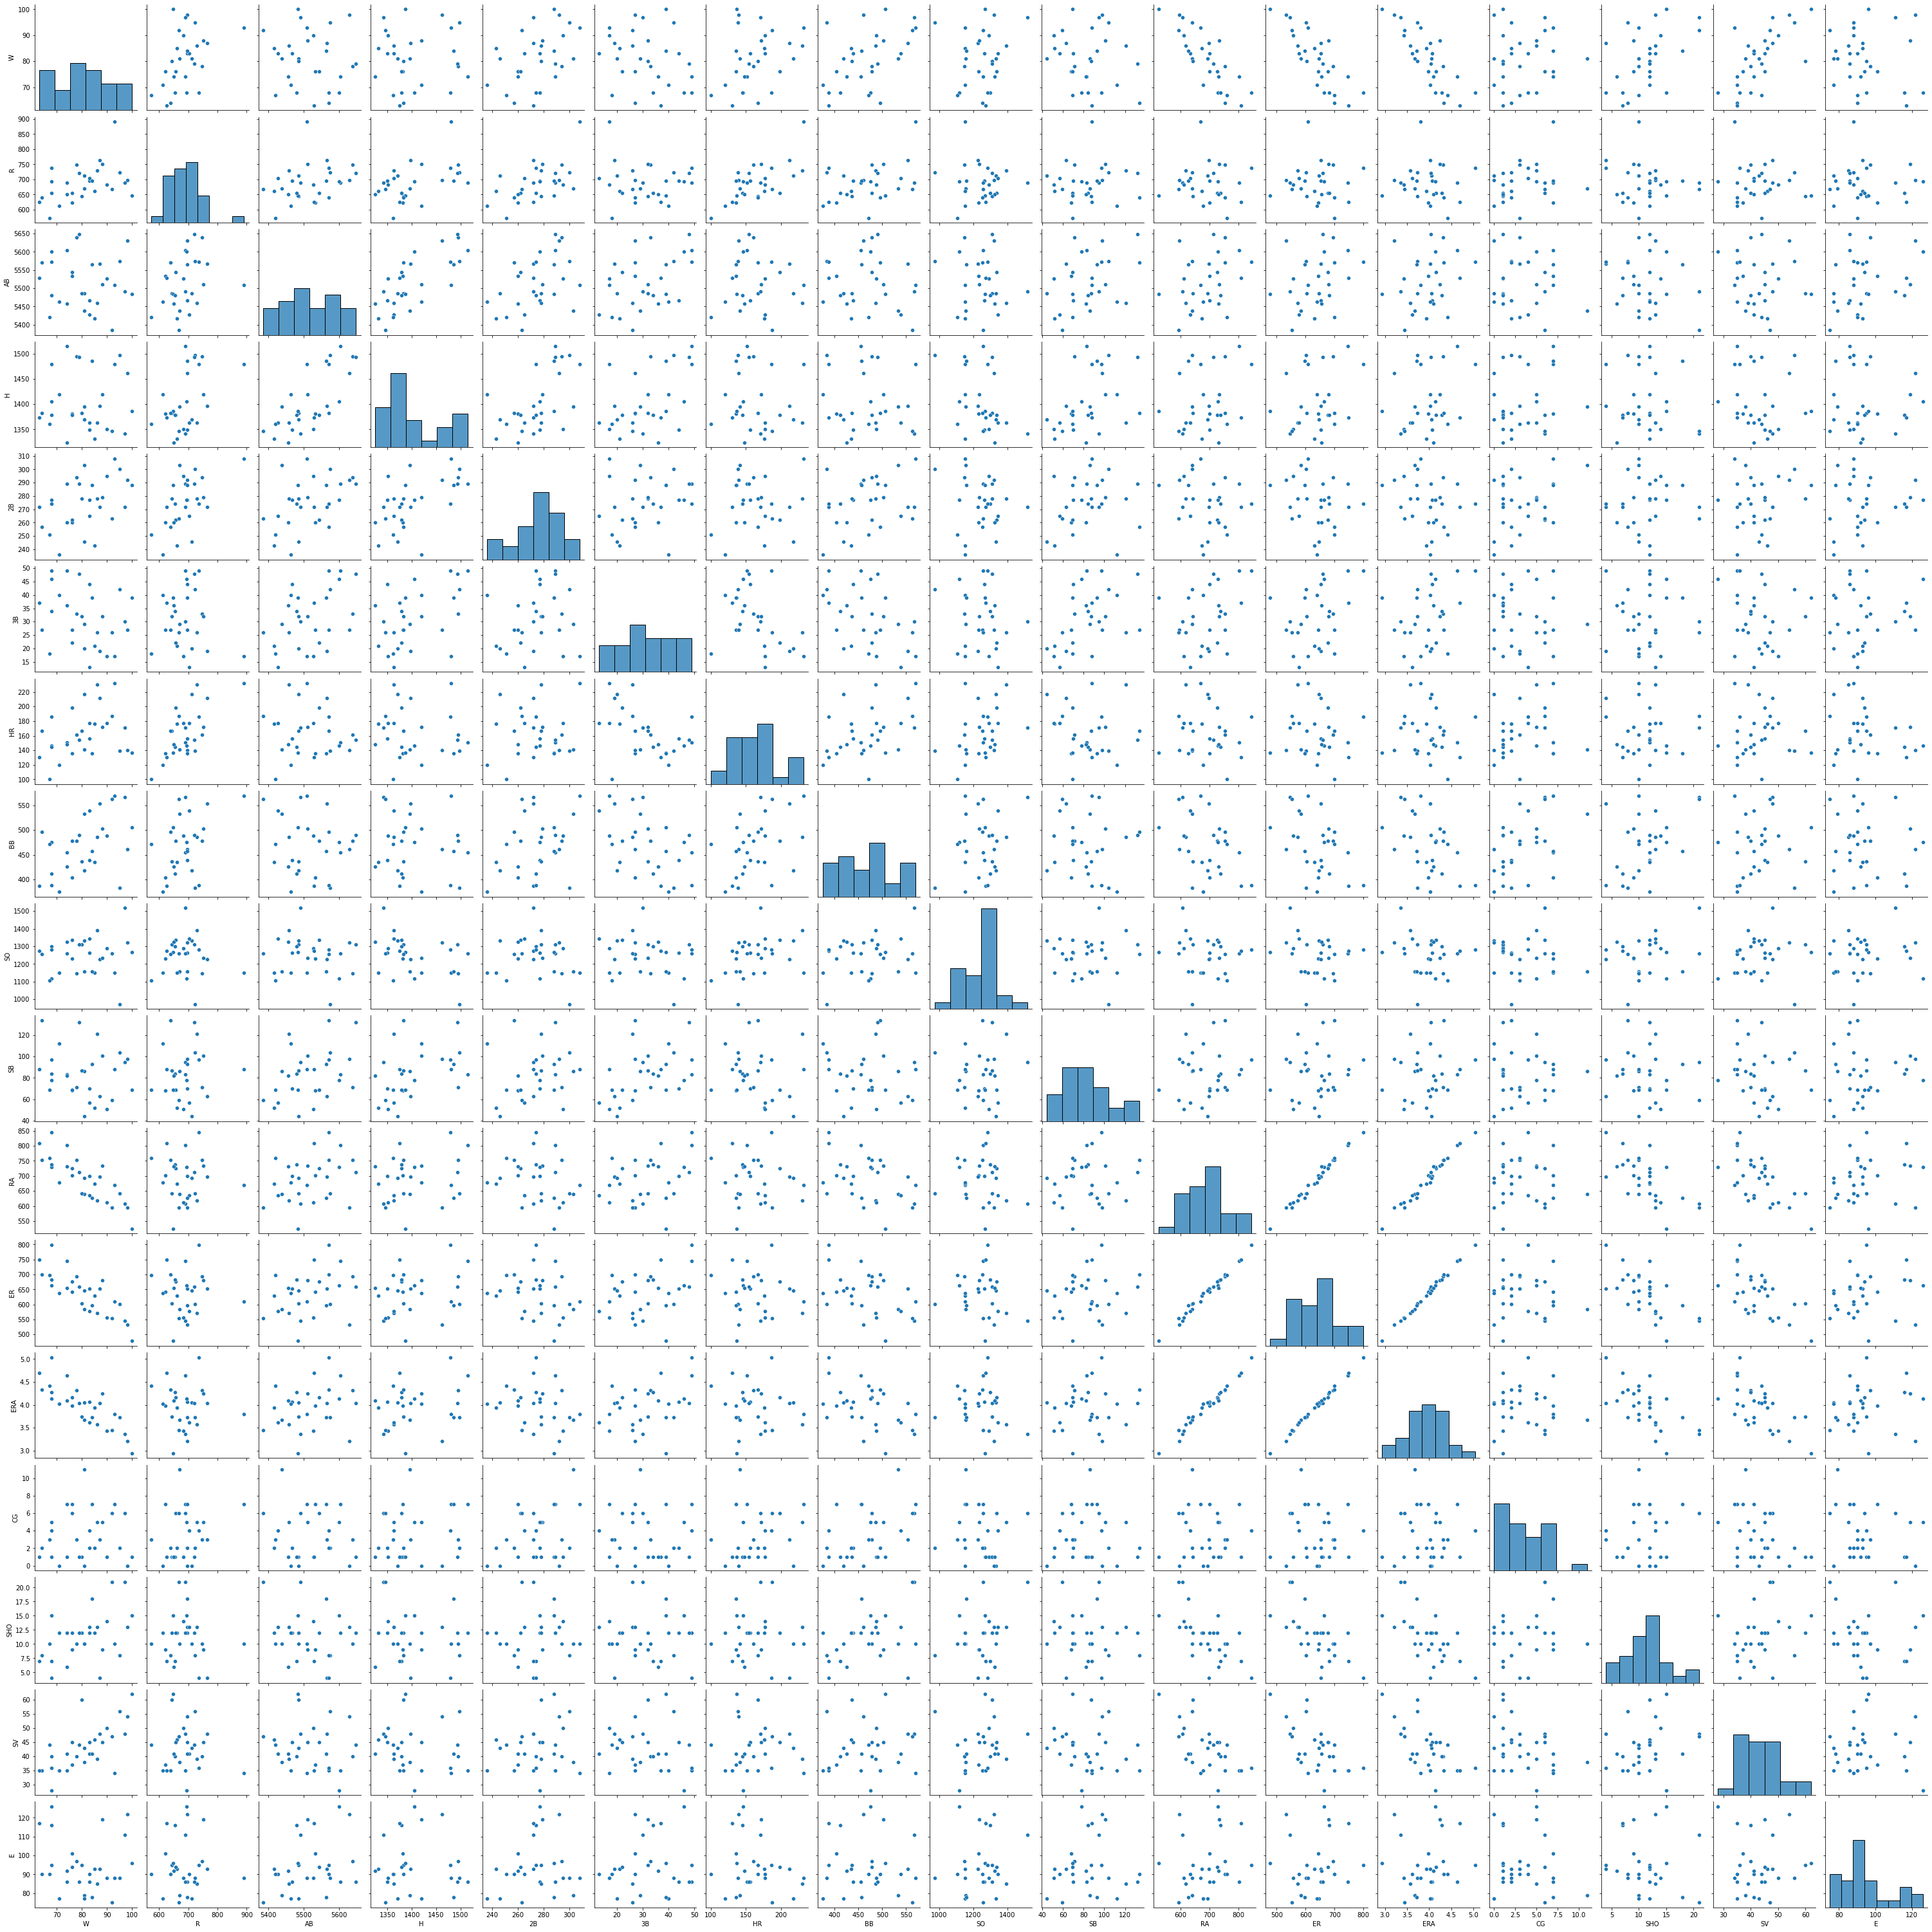

In [40]:
sns.pairplot(df)
plt.show()

Heatmap

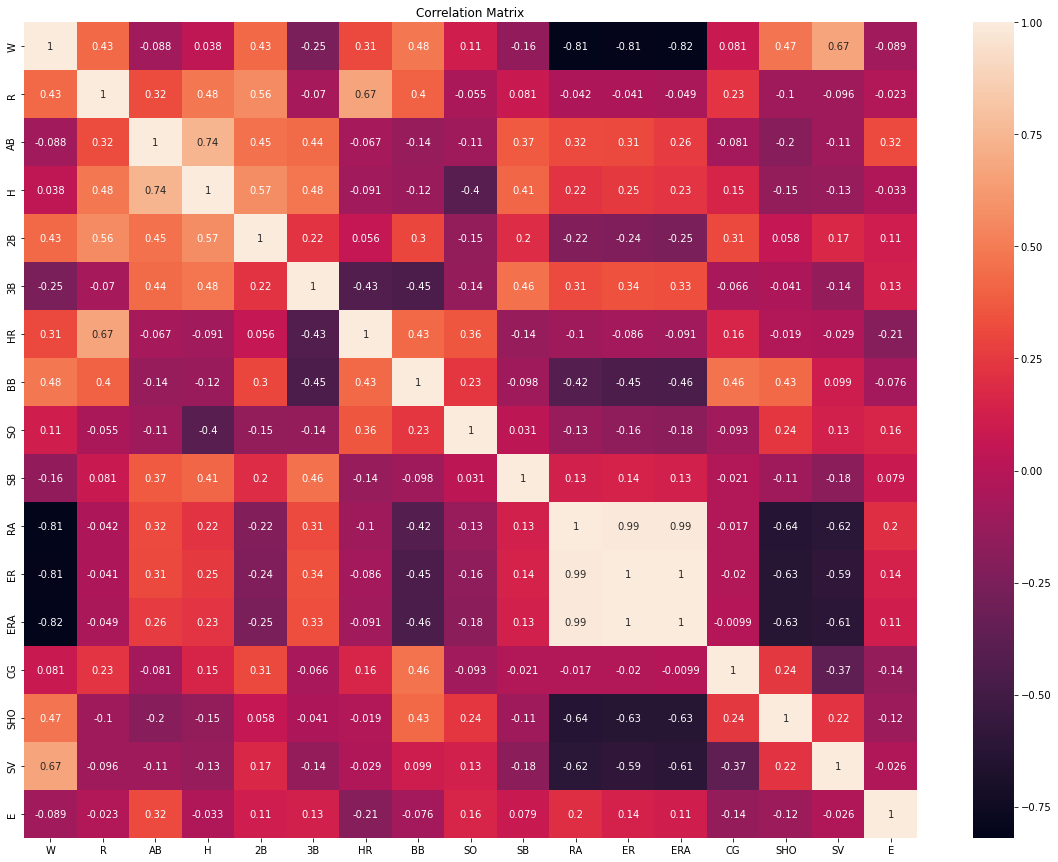

In [41]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

ERA,RA,ER having good correlation with target 'W'

# Checking ouliers

<AxesSubplot:>

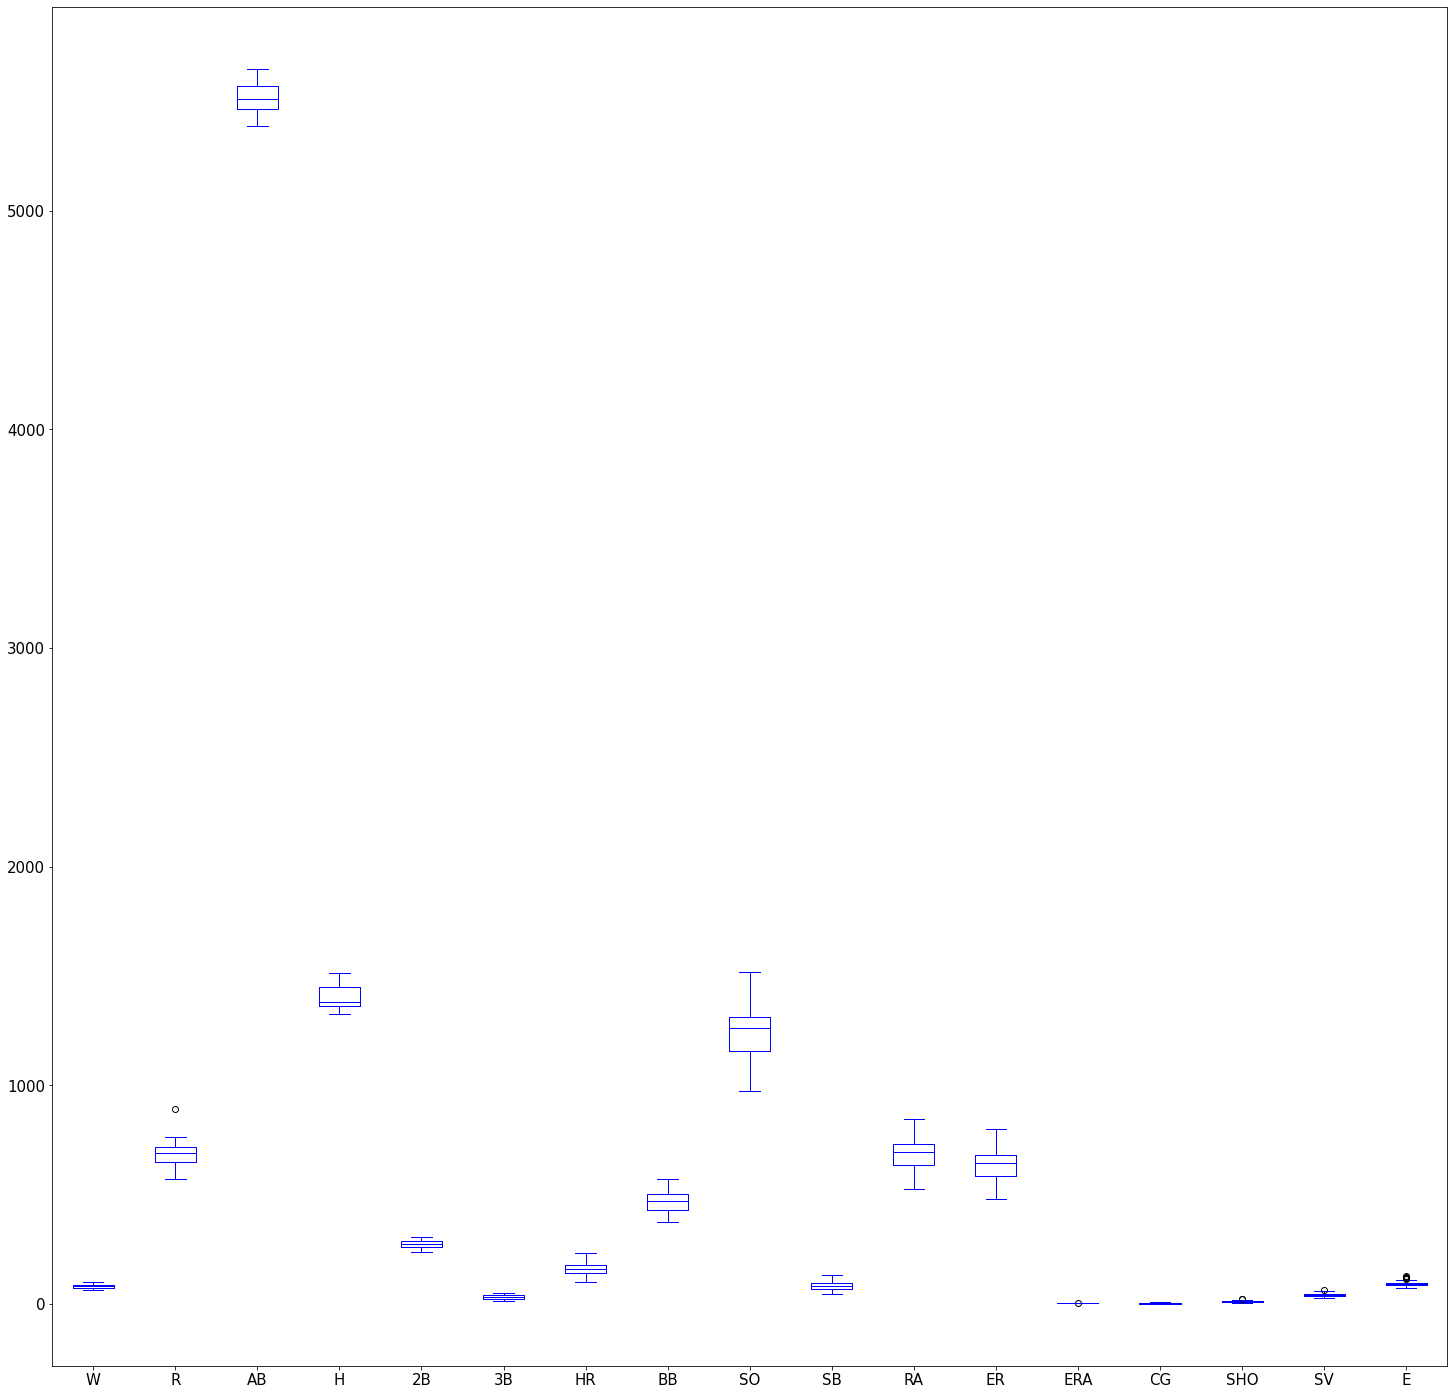

In [43]:
df.plot(kind='box',fontsize=15,figsize=(25,25),color='b')

checking out of boxplot we can see outliers in R,ERA,SHO,SV,and E errors

Removing Outliers

In [44]:
features =df[['R','ERA','SHO','SV','E']]

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3). all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [46]:
df_new.shape# checking new data shape

(29, 17)

In [47]:
#checking data loss
dataloss=(((30-29)/30)*100)
dataloss

3.3333333333333335

# Checking for Skewness

In [48]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

I can see that skewness in H,CG,SHO,SV, E

# Removing skewness

In [49]:
# list of skewed features
skew_features['H','CG','SHO','SV','E']

NameError: name 'skew_features' is not defined

In [50]:
#Removing skewness in H
df_new['H']=np.log1p(df_new['H'])

In [51]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')


In [52]:
# removing Skewness using yeo-johnson
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)

In [53]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

After removing skewness 

# Splitting the columns

In [54]:
x = df_new.drop('W',axis=1)# Feature
y = df_new['W']# target

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn. metrics import r2_score
from sklearn.model_selection import train_test_split

In [56]:
ssc= StandardScaler()
X= pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [57]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


In [58]:
# droping ER
X=X.drop(['ER'],axis=1)

In [59]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820


In [60]:
# droping ERA
X=X.drop(['ERA'],axis=1)

In [61]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.264463,0.236737,-1.149165,-0.540820


# Splitting the data for training and testing

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Let find the best random state

In [63]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9768383015216393
At random state0, The test accuracy is :-0.49963681285927775


At random state1, The training accuracy is :-0.9762285427209911
At random state1, The test accuracy is :-0.18565756675520972


At random state2, The training accuracy is :-0.9638255316870868
At random state2, The test accuracy is :--0.2679901647388272


At random state3, The training accuracy is :-0.9677990948927815
At random state3, The test accuracy is :-0.6776697786661834


At random state4, The training accuracy is :-0.9680569379679669
At random state4, The test accuracy is :-0.7641316816583286


At random state5, The training accuracy is :-0.9612472010423034
At random state5, The test accuracy is :-0.6051495407609396


At random state6, The training accuracy is :-0.9723763056746941
At random state6, The test accuracy is :-0.7504731543294726


At random state7, The training accuracy is :-0.9610245315460946
At random state7, The test accuracy is :-0.31669541

In [73]:
# splitting the data into training and testing


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=99)

In [74]:
x_train.shape

(23, 16)

In [75]:
y_train.shape

(23,)

In [76]:
x_test.shape

(6, 16)

In [77]:
y_test.shape

(6,)

# Model Building

# Regression Alogorithms

In [ ]:
#Importing  Libraries

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import classification_report
from sklearn import metrics

In [79]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.963145583402506


# SGD

In [86]:
from sklearn.linear_model import SGDRegressor
sgd= SGDRegressor()
sgd.fit(x_train,y_train)
pred = sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))


R2_score: -1.731190804944022e+29
mae: 2.6410277502090465e+31
mae: 5083327944950366.0
rmse: 5139093062213455.0


# Lasso regression

In [88]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1.10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 1.1, 'random_state': 0}


In [89]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8484996797297922
mae: 23.11221552566614
mae: 4.385288189343357
rmse: 4.807516565303352


Lasso is giving 84% r2_score

# Ridge Regressor

In [95]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1.10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 1.1, 'solver': 'sparse_cg'}


In [96]:
rd= Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8224887953172905
mae: 27.080320447706683
mae: 4.668904102411736
rmse: 5.203875521926585


Ridge R2_sore is 82%

In [98]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 89.91699369324681
mean_squared_error: 15.38218628796902
mean_absolute_error: 2.9668150169018723
RMSE value: 3.9220130402599405


# Saving the model

In [99]:
import joblib
joblib.dump(Final_mod,'Basebalcase study.pkl')# saved model using joblib

['Basebalcase study.pkl']

In [100]:
# loading saved model
model=joblib.load('Basebalcase study.pkl')

prediction = model.predict(x_test)
prediction

array([66.48932952, 62.05856215, 89.63270096, 77.42938692, 88.55209836,
       90.00000255])

In [ ]:
The best model is Linear Regression 90%